In [10]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV

In [11]:
# Use fivethirtyeight styling, because I like it
import matplotlib.style as style
style.use('seaborn-whitegrid')

In [12]:
df = pd.read_csv('final_data_set.csv')
df = df.drop('Unnamed: 0', axis=1)

In [13]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15',
       'walk_score', 'transit_score', 'pers_crime_score', 'prop_crime_score',
       'income', 'renovated_yrs_ago', 'log_price'],
      dtype='object')

In [14]:
# Set our X and y in preparation for train/test/split
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15',
       'walk_score', 'transit_score', 'pers_crime_score', 'prop_crime_score',
       'income', 'renovated_yrs_ago']]

y = pd.DataFrame(df['log_price'])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [16]:
# scikit learn requires the inputs to be in this shape
# X_train = X_train.values.reshape((len(X_train),1));
y_train = y_train.values.reshape((len(y_train),));
# X_test = X_test.values.reshape((len(X_test),1));
y_test = y_test.values.reshape((len(y_test),));

In [17]:
# First, let's get a look at our plain vanilla, "baseline" model.
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

# Get R-Squared for predictions
print(lm.score(X_test, y_test))

0.737910114263344


# RidgeCV

In [18]:
# Let's try RidgeCV!
est = make_pipeline(StandardScaler(), RidgeCV(cv=5, alphas=[10, 1, .1, .01, .001, .0001]))

est.fit(X_train, y_train)
print('Train R^2: ',est.score(X_train, y_train))
print('Train SSE:', 
      mean_squared_error(y_train, est.predict(X_train)))
print('\n')
scores.append((est.score(X_train, y_train), est.score(X_test, y_test)))

Train R^2:  0.741363921474395
Train SSE: 0.047162616646694425




NameError: name 'scores' is not defined

In [19]:
coeffs = est.get_params()['ridgecv'].coef_

In [20]:
import pprint as pprint

pprint.pprint(sorted(list(zip(coeffs*100, X.columns))))

[(-2.6390792552182427, 'prop_crime_score'),
 (-2.6390792552176987, 'pers_crime_score'),
 (-2.576149043373835, 'renovated_yrs_ago'),
 (-1.1509385889476993, 'floors'),
 (-0.4821114863378147, 'sqft_lot15'),
 (0.22877722836703884, 'bathrooms'),
 (0.35013905352587366, 'sqft_lot'),
 (0.351054196364354, 'bedrooms'),
 (2.000031931840073, 'waterfront'),
 (2.6136817877426153, 'sqft_basement'),
 (2.6864330303866257, 'transit_score'),
 (3.4108052384120686, 'view'),
 (4.376229960529393, 'condition'),
 (6.0801412452544525, 'sqft_living15'),
 (7.210604413613966, 'sqft_living'),
 (7.529928992756058, 'sqft_above'),
 (7.7424069172154875, 'yr_built'),
 (9.889668491027498, 'income'),
 (10.162564651345644, 'walk_score'),
 (13.322113170113983, 'grade')]


 # LassoCV

In [21]:
# Let's run a lasso CV
est = make_pipeline(StandardScaler(), LassoCV(cv=10, alphas=[10, 1, .1, .01, .001, .0001]))

est.fit(X_train, y_train)
print('Train R^2: ',est.score(X_train, y_train))
print('Train SSE:', 
      mean_squared_error(y_train, est.predict(X_train)))
print('\n')

Train R^2:  0.7411592626996222
Train SSE: 0.047199936433605115




In [256]:
# Let's see what our optimal alpha is
est.get_params()['lassocv'].alpha_

0.001

In [23]:
coeffs = est.get_params()['lassocv'].coef_

In [24]:
intercept = est.get_params()['lassocv'].intercept_

In [25]:
import pprint as pprint

# Multiplied coefficients by 100 to make comparison easier
pprint.pprint(sorted(list(zip(coeffs*100, X.columns))))

[(-5.1508522255780935, 'pers_crime_score'),
 (-1.7313956367034762, 'renovated_yrs_ago'),
 (-0.7889202892086198, 'floors'),
 (-0.12925926662256107, 'sqft_lot15'),
 (-9.519295074422729e-15, 'prop_crime_score'),
 (0.0, 'sqft_basement'),
 (0.0, 'sqft_lot'),
 (0.11478333667480373, 'bathrooms'),
 (0.27197323602193857, 'bedrooms'),
 (1.8851114037967371, 'waterfront'),
 (2.522352560703445, 'transit_score'),
 (3.36190269515554, 'view'),
 (3.7559112880139494, 'sqft_above'),
 (4.186107616618545, 'condition'),
 (5.976328776157317, 'sqft_living15'),
 (7.1695175867930265, 'yr_built'),
 (9.841104402240948, 'income'),
 (9.996465164262489, 'walk_score'),
 (12.16280931325881, 'sqft_living'),
 (13.32315688265607, 'grade')]


In [153]:
features = pd.DataFrame(list(zip(coeffs*100, X.columns)), columns=['Coefficient', 'Feature'])

In [154]:
features = features.sort_values(by='Coefficient')

### This shows we can do away with Sqft. Lot, Sqft. Basement, and several other features barely add any information

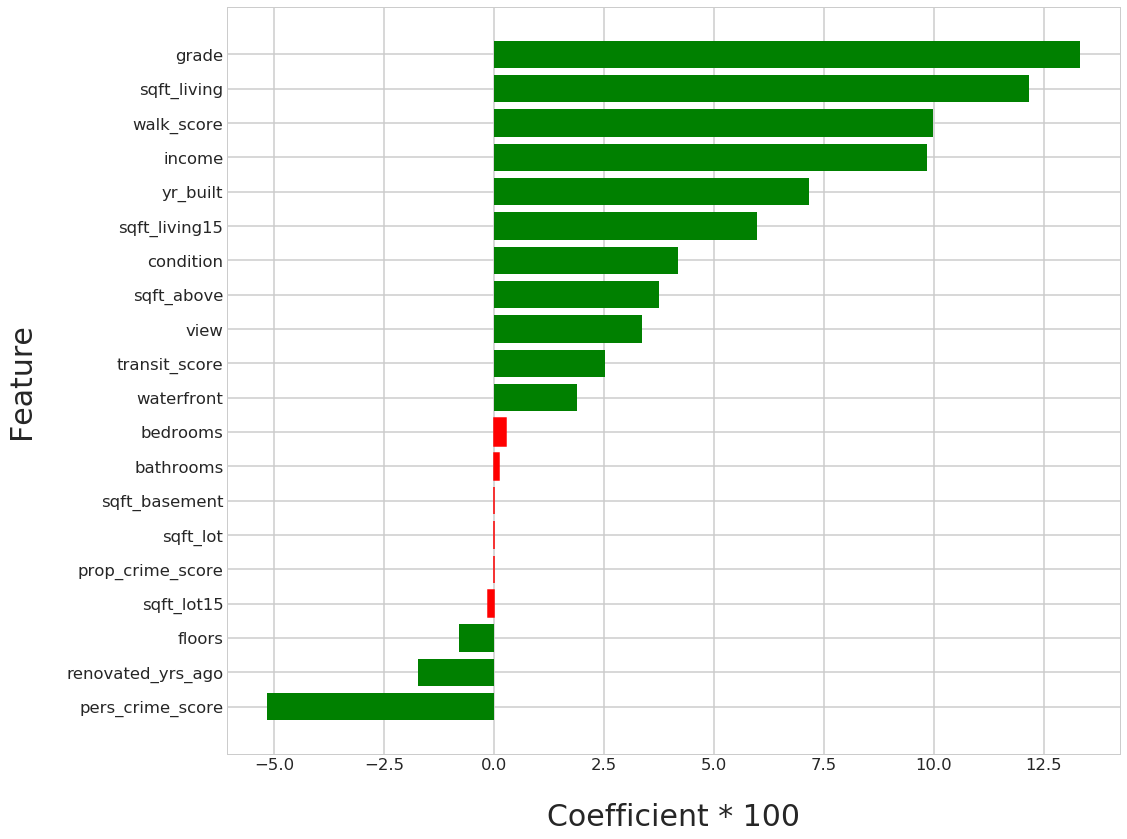

In [157]:
sns.set_context('talk')
with plt.style.context(('seaborn-whitegrid')):
    fig, ax = plt.subplots(figsize=(16,12))
barlist = plt.barh(features['Feature'], features['Coefficient'], color='g')
for i in range(3,9):
    barlist[i].set_color('r')
ax.set_xlabel('Coefficient * 100', labelpad=30, fontsize=30)
ax.set_ylabel('Feature', labelpad=30, fontsize=30)
plt.tight_layout()
# plt.savefig('plots/coefficients2.jpg', dpi=300)


## Now let's remove those features and try again

In [97]:
# Removing the features eliminated by Lasso CV
X = df[['sqft_living', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 'sqft_living15',
       'walk_score', 'transit_score', 'pers_crime_score',
       'income', 'renovated_yrs_ago']]

y = pd.DataFrame(df['log_price'])

In [98]:
# Let's try RidgeCV again!
est = make_pipeline(StandardScaler(), RidgeCV(cv=5, alphas=[10, 1, .1, .01, .001, .0001]))

est.fit(X_train, y_train)
print('Train R^2: ',est.score(X_train, y_train))
print('Train SSE:', 
      mean_squared_error(y_train, est.predict(X_train)))
print('\n')

# Leaving out the test eval for now until we finalize our model

print('Test R^2: ', est.score(X_test, y_test))
print('Test SSE:', 
      mean_squared_error(y_test, est.predict(X_test)))
print('\n')

Train R^2:  0.741363921474395
Train SSE: 0.047162616646694425


Test R^2:  0.73797025761616
Test SSE: 0.04710648317365267




In [102]:
predictions = est.predict(X_test)

In [99]:
coeffs = est.get_params()['ridgecv'].coef_

In [13]:
import pprint as pprint

pprint.pprint(sorted(list(zip(coeffs*100, X.columns))))

[(-1.1509385889476993, 'condition'),
 (-0.4821114863378147, 'renovated_yrs_ago'),
 (0.22877722836703884, 'floors'),
 (0.35013905352587366, 'view'),
 (0.351054196364354, 'sqft_living'),
 (2.000031931840073, 'grade'),
 (2.6136817877426153, 'transit_score'),
 (3.4108052384120686, 'sqft_above'),
 (4.376229960529393, 'yr_built'),
 (6.0801412452544525, 'income'),
 (7.210604413613966, 'waterfront'),
 (7.529928992756058, 'walk_score'),
 (7.7424069172154875, 'pers_crime_score'),
 (13.322113170113983, 'sqft_living15')]


In [20]:
predictions = est.predict(X_test)

In [28]:
y_test = y_test[0]

# Plot the new one with fewer variables

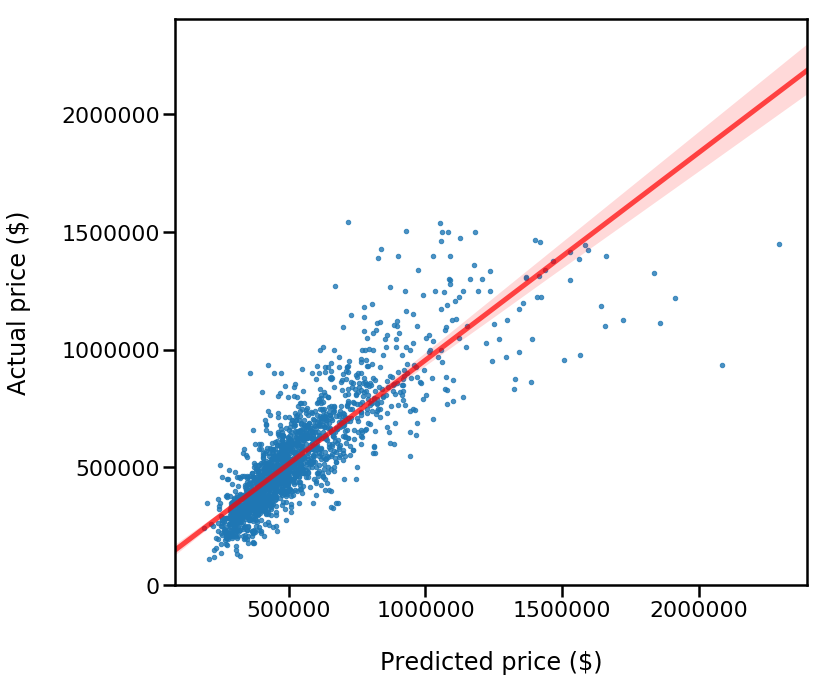

In [105]:
# Plot the linear regression
sns.set_context('poster')
# fig = plt.figure(figsize=(12,12))
fig, ax = plt.subplots(figsize=(12,10))
sns.regplot(np.exp(predictions), np.exp(y_test), line_kws={"color":"r","alpha":0.7,"lw":5}, scatter_kws={'alpha': 0.8, 's': 20}, ax=ax)
ax.set_xlabel('Predicted price ($)', labelpad=30)
ax.set_ylabel('Actual price ($)', labelpad=30)
# ax.set_xlim(12.25,14.25)
plt.tight_layout()
fig.savefig('plots/regplot-thurs.jpg')

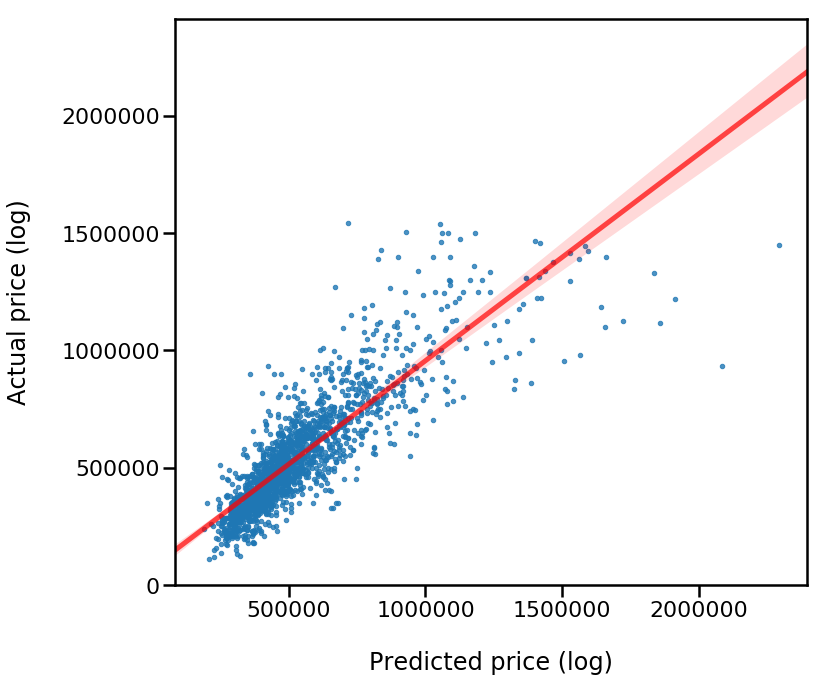

In [32]:
# Plot the linear regression
sns.set_context('poster')
# fig = plt.figure(figsize=(12,12))
fig, ax = plt.subplots(figsize=(12,10))
sns.regplot(np.exp(predictions), np.exp(y_test), line_kws={"color":"r","alpha":0.7,"lw":5}, scatter_kws={'alpha': 0.8, 's': 20}, ax=ax)
ax.set_xlabel('Predicted price ($)', labelpad=30)
ax.set_ylabel('Actual price ($)', labelpad=30)
# ax.set_xlim(12.25,14.25)
plt.tight_layout()
# fig.savefig('plots/regplot-weds-2.jpg')

In [244]:
coeffs = est.get_params()['ridgecv'].coef_

In [246]:
import pprint as pprint

pprint.pprint(sorted(list(zip(coeffs*100, X.columns))))

[(-2.6390792552182427, 'prop_crime_score'),
 (-2.6390792552176987, 'pers_crime_score'),
 (-2.576149043373835, 'renovated_yrs_ago'),
 (-1.1509385889476993, 'floors'),
 (-0.4821114863378147, 'sqft_lot15'),
 (0.22877722836703884, 'bathrooms'),
 (0.35013905352587366, 'sqft_lot'),
 (0.351054196364354, 'bedrooms'),
 (2.000031931840073, 'waterfront'),
 (2.6136817877426153, 'sqft_basement'),
 (2.6864330303866257, 'transit_score'),
 (3.4108052384120686, 'view'),
 (4.376229960529393, 'condition'),
 (6.0801412452544525, 'sqft_living15'),
 (7.210604413613966, 'sqft_living'),
 (7.529928992756058, 'sqft_above'),
 (7.7424069172154875, 'yr_built'),
 (9.889668491027498, 'income'),
 (10.162564651345644, 'walk_score'),
 (13.322113170113983, 'grade')]


In [262]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,walk_score,transit_score,pers_crime_score,prop_crime_score,income,renovated_yrs_ago
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,60,1340,5650,46,46,3.0,3.0,71524,60
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,64,1690,7639,64,50,3.0,3.0,56208,24
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,82,2720,8062,19,26,3.0,3.0,96863,82
3,3,2.50,3560,9796,1.0,0,0,3,8,1860,1700,50,2210,8925,46,40,3.0,3.0,72383,50
4,2,1.00,1160,6000,1.0,0,0,4,7,860,300,73,1330,6000,72,48,2.0,2.0,103917,73


In [200]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15',
       'walk_score', 'transit_score', 'pers_crime_score', 'prop_crime_score',
       'income', 'renovated_yrs_ago'],
      dtype='object')

In [277]:
my_house = [4, 1.5, 2440, 2168, 2.0, 0, 0, 6, 6, 2000, 440, 111, 2440, 2168, 88, 72, 3.0, 2.0, 72396, 3]

In [278]:
my_house = pd.Series(my_house)

In [279]:
np.exp(est.predict(house_params))

array([745754.3464984])

In [ ]:
def get_house_estimate():
    params = []
    for parameter in X.columns:
        val = input(f'Enter value for: {parameter}')
        params.append(val)
    params = pd.Series(params)
    home_value = np.exp(est.predict(house_params))
    print('Your home is worth: ${home_value}')
    return home_value

# Add Polynomials

In [36]:
# Let's run a lasso CV with Polynomials!
for i in range(1, 5):
    est = make_pipeline(PolynomialFeatures(i), StandardScaler(), RidgeCV(cv=5, alphas=[.1, .01, .001, .0001]))

    est.fit(X_train, y_train)
    print(f'Polynomial degrees: {i}')
    print('Train R^2: ',est.score(X_train, y_train))
    print('Train SSE:', 
          mean_squared_error(y_train, est.predict(X_train)))
    print('\n')

Polynomial degrees: 1
Train R^2:  0.741367119476664
Train SSE: 0.04716203348692834


Polynomial degrees: 2
Train R^2:  0.7811286156985074
Train SSE: 0.03991147426758056


Polynomial degrees: 3
Train R^2:  0.8426815804353012
Train SSE: 0.028687213151738167


Polynomial degrees: 4
Train R^2:  0.9131336675567944
Train SSE: 0.01584018579263153




## Final Regression Model Output:

In [109]:

# est = make_pipeline(PolynomialFeatures(2), StandardScaler(), RidgeCV(cv=5, alphas=[.1, .01, .001, .0001]))

# est.fit(X_train, y_train)
# predictions = est.predict(X_test)

# # print('Train R^2: ',est.score(X_train, y_train))
# # print('Train SSE:', 
# #       mean_squared_error(y_train, est.predict(X_train)))
# # print('\n')



# print('Train R^2: ',est.score(X_train, y_train))
# print('Train SSE:', 
#       mean_squared_error(y_train, est.predict(X_train)))
# print('Test R^2: ', est.score(X_test, y_test))
# print('Test SSE:', 
#       mean_squared_error(y_test, est.predict(X_test)))
# print('\n')

Train R^2:  0.7811286156985074
Train SSE: 0.03991147426758056
Test R^2:  0.7419353609561843
Test SSE: 0.04639365541574481




In [111]:
# Alpha of 0.1 used for RidgeCV
est.get_params()['ridgecv'].alpha_

0.1

In [112]:
predictions = est.predict(X_test)

In [113]:
predictions

array([12.61867156, 12.75357466, 13.06173881, ..., 12.89410939,
       13.33668175, 12.6926996 ])

In [114]:
y_train

array([13.50626431, 13.19747085, 12.46843691, ..., 12.84399777,
       13.31132948, 13.41054532])

In [116]:
predictions.shape

(1756,)

In [117]:
y_train.shape

(4096,)

In [74]:
import pickle

In [118]:
# Make backups
with open('estimator.pkl', 'wb') as f:
    pickle.dump(est, f)

with open('y_test.pkl', 'wb') as f:
    pickle.dump(y_test, f)
    
with open('predictions.pkl', 'wb') as f:
    pickle.dump(predictions, f)

In [ ]:
ylabels2 = list(range(0,18000, 2000))

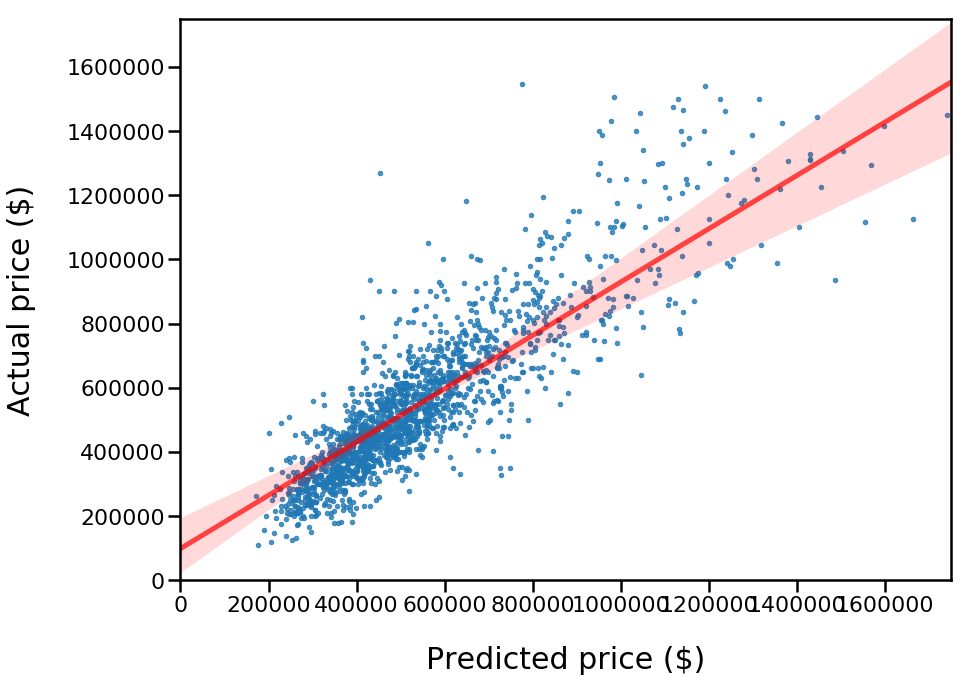

In [115]:
# Plot the actual (non-log) values
sns.set_context('poster')
# fig = plt.figure(figsize=(12,10))
fig, ax = plt.subplots(figsize=(14,10))
sns.regplot(x=np.exp(predictions), y=np.exp(y_test), line_kws={"color":"r","alpha":0.7,"lw":5}, scatter_kws={'alpha': 0.8, 's': 20}, ax=ax)
ax.set_xlabel('Predicted price ($)', labelpad=30, fontsize=30)
ax.set_ylabel('Actual price ($)', labelpad=30, fontsize=30)
ax.set_ylim([0,1750000])
ax.set_xlim([0,1750000])
# ax.set_yticklabels(ylabels2)
# ax.set_xticklabels(ylabels2)
plt.tight_layout()
# plt.savefig('plots/regplot-dollars-weds-2.jpg')



In [135]:
ylabels2 = ['0', '$200k', '$400k', '$600k', '$800k', '$1.0m', '$1.2m', '$1.4m']

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [31]:
resid = np.exp(y_test) - np.exp(predictions)

In [32]:
resid_df = pd.DataFrame(resid)

In [168]:
resid_df.describe()

,0
count,1.756000e+03
mean,6.992757e+03
std,1.475849e+05
min,-3.655726e+06
25%,-5.659608e+04
50%,2.385180e+03
75%,6.651213e+04
max,8.166891e+05


In [34]:
ylabels2

[0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000]

In [158]:
np.mean(resid)

6992.757337265996

In [55]:
xlabels = list(range(0, 1600000, 200000))

In [58]:
ylabels3 = list(range(-600000, 800000, 200000))
ylabels3[0] = ''

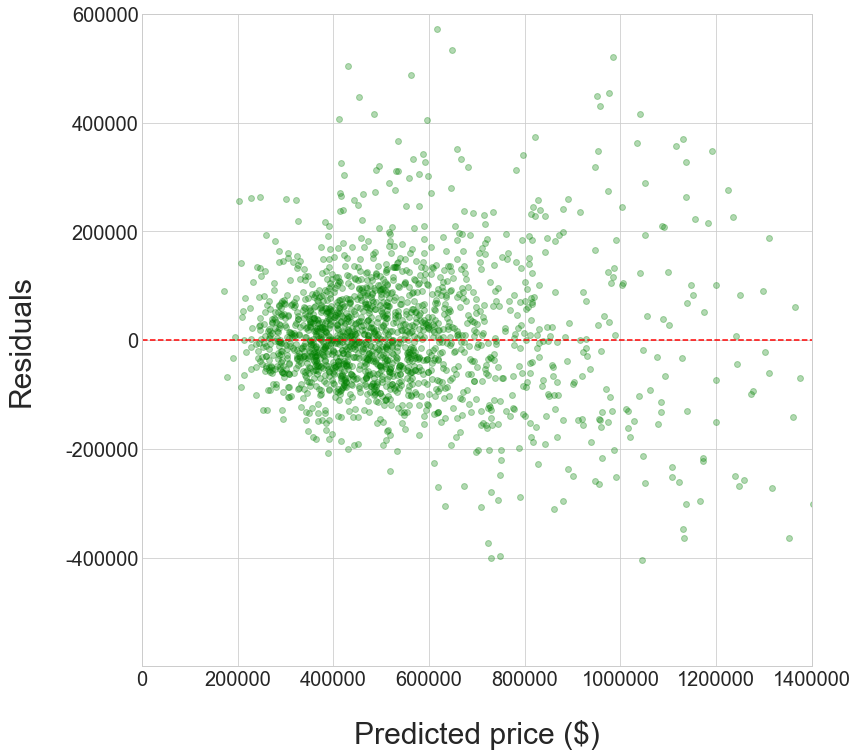

In [61]:
fig, ax = plt.subplots(figsize=(12,12))
sns.regplot(x=np.exp(predictions), y=resid, scatter_kws={'alpha': 0.3, 's': 35, 'color': 'green'}, fit_reg=False, x_jitter=True, y_jitter=True)
ax.set_xlabel('Predicted price ($)', labelpad=30, fontsize=30)
ax.set_ylabel('Residuals', labelpad=30, fontsize=30)
plt.axhline(y=0.0, color='r', linestyle='--')
ax.set_xlim([0,1400000])
ax.set_ylim([-600000,600000])
ax.set_xticklabels(xlabels, fontsize=20);
ax.set_yticklabels(ylabels3, fontsize=20);
# plt.savefig('plots/residuals_dollars.jpg')

In [ ]:
est.fit(X_train, y_train)
print('Train R^2: ',est.score(X_train, y_train))
print('Train SSE:', 
      mean_squared_error(y_train, est.predict(X_train)))
print('Test R^2: ', est.score(X_test, y_test))
print('Test SSE:', 
      mean_squared_error(y_test, est.predict(X_test)))

In [66]:
degrees = [0,1,2,3,4]
scores = []

for degree in degrees:
    est = make_pipeline(PolynomialFeatures(degree), StandardScaler(), LassoCV(alphas=[1,.1, .01, .001, .0001]))

    est.fit(X_train, y_train)
    print(f'Degrees: {degree}')
    print('Train R^2: ',est.score(X_train, y_train))
    print('Train SSE:', 
          mean_squared_error(y_train, est.predict(X_train)))
    print('Test R^2: ', est.score(X_test, y_test))
    print('Test SSE:', 
          mean_squared_error(y_test, est.predict(X_test)))
    print('\n')
    scores.append((est.score(X_train, y_train), est.score(X_test, y_test)))

Degrees: 0
Train R^2:  0.0
Train SSE: 0.18235126713779534
Test R^2:  -0.00035409702747424276
Test SSE: 0.1798389870196103


Degrees: 1
Train R^2:  0.7411592626996222
Train SSE: 0.047199936433605115
Test R^2:  0.7377644978428741
Test SSE: 0.04714347370461272


Degrees: 2
Train R^2:  0.7646852313927007
Train SSE: 0.04290994623177813
Test R^2:  0.7519565628980943
Test SSE: 0.044592090538560565


Degrees: 3
Train R^2:  0.776907411875761
Train SSE: 0.040681216133505255
Test R^2:  0.7535682239829176
Test SSE: 0.04430235363662275


Degrees: 4
Train R^2:  0.7846819063499166
Train SSE: 0.03926352721478719
Test R^2:  0.7541725728804087
Test SSE: 0.04419370661467906




In [29]:
degrees = [0,1,2,3,4]
scores = []

for degree in degrees:
    est = make_pipeline(PolynomialFeatures(degree), StandardScaler(), 
                        RidgeCV(cv=3,alphas=(1e-14,1e-8,1e-2,100)))

    est.fit(X_train, y_train)
    print(f'Degrees: {degree}')
    print('Train R^2: ',est.score(X_train, y_train))
    print('Train SSE:', 
          mean_squared_error(y_train, est.predict(X_train)))
    print('Test R^2: ', est.score(X_test, y_test))
    print('Test SSE:', 
          mean_squared_error(y_test, est.predict(X_test)))
    print('\n')
    scores.append((est.score(X_train, y_train), est.score(X_test, y_test)))

Degrees: 0
Train R^2:  0.0
Train SSE: 0.16732274757448443
Test R^2:  -0.0002066845794210792
Test SSE: 0.23278813399095816


Degrees: 1
Train R^2:  0.7386853114692804
Train SSE: 0.04372389166653061
Test R^2:  0.7210343498194889
Test SSE: 0.06492647385215417




/Users/brenner/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.548403e-18
  overwrite_a=True).T
/Users/brenner/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/brenner/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/brenner/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Degrees: 2
Train R^2:  0.7780350332323118
Train SSE: 0.03713978810484871
Test R^2:  0.7416055707128952
Test SSE: 0.06013872727984895




/Users/brenner/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/brenner/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/brenner/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Degrees: 3
Train R^2:  0.8288968296675351
Train SSE: 0.028629452578733044
Test R^2:  0.7235232285442461
Test SSE: 0.06434721214255094




/Users/brenner/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/brenner/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:152: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.142248e-19
  overwrite_a=False)
/Users/brenner/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Degrees: 4
Train R^2:  0.8786343223284642
Train SSE: 0.02030723864924063
Test R^2:  0.6617951109753841
Test SSE: 0.07871381609068608




In [23]:
alphas = [1e-7, 1e-5, 1e-3, 1e-1, 1e-0]
scores = []
for alpha in alphas:
    est = make_pipeline(StandardScaler(), Lasso(alpha=alpha))

    est.fit(X_train, y_train)
    print(f'Alpha: {alpha}')
    print('Train R^2: ',est.score(X_train, y_train))
    print('Train SSE:', 
          mean_squared_error(y_train, est.predict(X_train)))
    print('Test R^2: ', est.score(X_test, y_test))
    print('Test SSE:', 
          mean_squared_error(y_test, est.predict(X_test)))
    print('\n')
    scores.append((est.score(X_train, y_train), est.score(X_test, y_test)))

Alpha: 1e-07
Train R^2:  0.7590337091356856
Train SSE: 0.040319141860249465
Test R^2:  0.7416805888477027
Test SSE: 0.06012126755688715


Alpha: 1e-05
Train R^2:  0.7590333980567922
Train SSE: 0.040319193910824634
Test R^2:  0.7416762400900081
Test SSE: 0.06012227968688439


Alpha: 0.001
Train R^2:  0.7586600469289441
Train SSE: 0.0403816640473462
Test R^2:  0.7406746192029934
Test SSE: 0.060355396962392865


Alpha: 0.1
Train R^2:  0.4992102030091564
Train SSE: 0.08379352478977622
Test R^2:  0.5153345150005546
Test SSE: 0.11280105962327713


Alpha: 1.0
Train R^2:  0.0
Train SSE: 0.16732274757448443
Test R^2:  -0.0002066845794210792
Test SSE: 0.23278813399095816




/Users/brenner/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/brenner/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [49]:
est.get_params()['linearregression'].coef_

array([[ 5.68169392e+06, -4.60802485e+06,  4.32364323e+06, ...,
         4.27056626e+04,  1.56043551e+03,  5.69322371e+04]])

In [25]:
# Without StandardScaler
alphas = [1e-7, 1e-5, 1e-3, 1e-1, 1e-0]
scores = []
for alpha in alphas:
    est = make_pipeline(Lasso(alpha=alpha))

    est.fit(X_train, y_train)
    print(f'Alpha: {alpha}')
    print('Train R^2: ',est.score(X_train, y_train))
    print('Train SSE:', 
          mean_squared_error(y_train, est.predict(X_train)))
    print('Test R^2: ', est.score(X_test, y_test))
    print('Test SSE:', 
          mean_squared_error(y_test, est.predict(X_test)))
    print('\n')
    scores.append((est.score(X_train, y_train), est.score(X_test, y_test)))

Alpha: 1e-07
Train R^2:  0.7590337091674357
Train SSE: 0.04031914185493695
Test R^2:  0.7416805967539695
Test SSE: 0.06012126571678237


Alpha: 1e-05
Train R^2:  0.7590336967317955
Train SSE: 0.040319143935702406
Test R^2:  0.7416774449371375
Test SSE: 0.06012199927072709


Alpha: 0.001
Train R^2:  0.7589094116694077
Train SSE: 0.04033993965382361
Test R^2:  0.7412816152977253
Test SSE: 0.06021412467296415


Alpha: 0.1
Train R^2:  0.657186161075701
Train SSE: 0.057360553435370436
Test R^2:  0.6702966312276257
Test SSE: 0.0767351720103


Alpha: 1.0
Train R^2:  0.6279853580524748
Train SSE: 0.06224651202859795
Test R^2:  0.6639791379403603
Test SSE: 0.0782055055888656




/Users/brenner/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/brenner/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/brenner/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [254]:
def get_house_estimate():
    params = []
    for parameter in X.columns:
        val = input(f'Enter value for: {parameter}')
        params.append(val)
    params = pd.Series(params)
    home_value = np.exp(est.predict(house_params))
    print('Your home is worth: ${home_value}')
    return home_value

In [251]:
# Showing how the function works! Enter your house's info - and see what the model thinks!
get_house_estimate()

Enter value for: bedrooms 4
Enter value for: bathrooms 2
Enter value for: sqft_living 2100
Enter value for: sqft_lot 2100
Enter value for: floors 2
Enter value for: waterfront 0
Enter value for: view 0
Enter value for: condition 7
Enter value for: grade 7
Enter value for: sqft_above 1900
Enter value for: sqft_basement 200
Enter value for: yr_built 80
Enter value for: sqft_living15 2100
Enter value for: sqft_lot15 2100
Enter value for: walk_score 82
Enter value for: transit_score 72
Enter value for: pers_crime_score 4
Enter value for: prop_crime_score 2
Enter value for: income 71000
Enter value for: renovated_yrs_ago 5


[812314.39460002]


array([812314.39460002])